In [25]:
from video_analyzer import VideoAnalyzer

import os

from pprint import pprint
vid = VideoAnalyzer('test/preludia.mkv')
vid.get_files_dict()
vid.add_files_to_db()
pprint(vid.files_dict)

Идет подключение к базе данных
Подключение установлено
{'c:\\Users\\HP\\OneDrive\\Рабочий стол\\вуз\\Проект питон\\test\\preludia.mkv': {'attributes': {'cdate': datetime.datetime(2023, 6, 29, 23, 35, 12, 797765),
                                                                                                 'mtime': datetime.datetime(2023, 6, 29, 23, 36, 5, 517761),
                                                                                                 'size': 344236468,
                                                                                                 'uid': 0},
                                                                                  'audio_attributes': [{'audioBitrate': '192000',
                                                                                                        'audioCodec': 'AC-3',
                                                                                                        'channels': '2',
                             

c:\Users\HP\OneDrive\Рабочий стол\вуз\Проект питон\video_analyzer.py:281: SAWarning: relationship 'VideoInfo.videoinfo_audio' will copy column videoinfo.id to column videoinfo_audio.video_id, which conflicts with relationship(s): 'AudioInfo.videoinfo' (copies videoinfo.id to videoinfo_audio.video_id), 'VideoInfo.audio' (copies videoinfo.id to videoinfo_audio.video_id). If this is not the intention, consider if these relationships should be linked with back_populates, or if viewonly=True should be applied to one or more if they are read-only. For the less common case that foreign key constraints are partially overlapping, the orm.foreign() annotation can be used to isolate the columns that should be written towards.   To silence this warning, add the parameter 'overlaps="audio,videoinfo"' to the 'VideoInfo.videoinfo_audio' relationship. (Background on this warning at: https://sqlalche.me/e/20/qzyx) (This warning originated from the `configure_mappers()` process, which was invoked automa

In [26]:
from video_analyzer import VideoAnalyzer
vid = VideoAnalyzer('test/music.mp4')
vid.create_thumbnails_by_count('test/music.mp4')

Идет подключение к базе данных
Подключение установлено


'thumbnails\\file_id(music)'

In [27]:
from video_analyzer import VideoAnalyzer
vid = VideoAnalyzer('test/music.mp4')
vid.create_thumbnails_by_steps('test/music.mp4', step=11)

Идет подключение к базе данных
Подключение установлено
[1, 3.0]


'thumbnails\\file_id(music)'

In [28]:
from video_analyzer import VideoAnalyzer

from pprint import pprint
vid = VideoAnalyzer('test/preludia.mkv')
vid.get_files_dict()
vid.add_files_to_db()
vid.db_to_csv()
pprint(vid.files_dict)

Идет подключение к базе данных
Подключение установлено
{'c:\\Users\\HP\\OneDrive\\Рабочий стол\\вуз\\Проект питон\\test\\preludia.mkv': {'attributes': {'cdate': datetime.datetime(2023, 6, 29, 23, 35, 12, 797765),
                                                                                                 'mtime': datetime.datetime(2023, 6, 29, 23, 36, 5, 517761),
                                                                                                 'size': 344236468,
                                                                                                 'uid': 0},
                                                                                  'audio_attributes': [{'audioBitrate': '192000',
                                                                                                        'audioCodec': 'AC-3',
                                                                                                        'channels': '2',
                             

# Анализ собраной статистики с использованием matplotlib

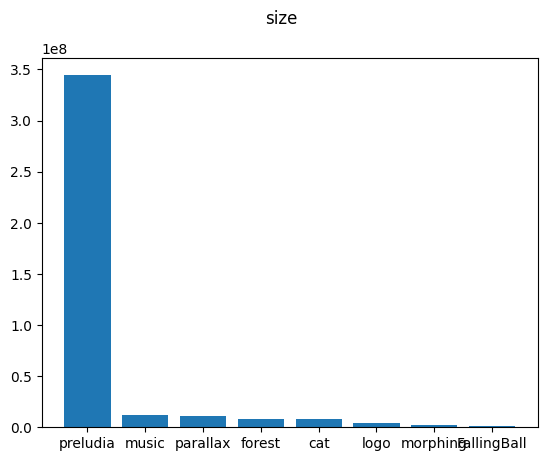

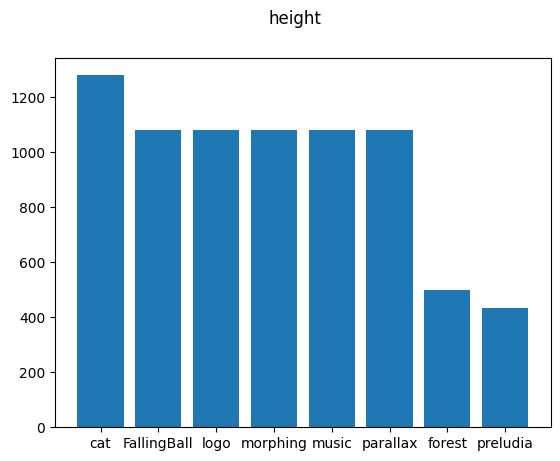

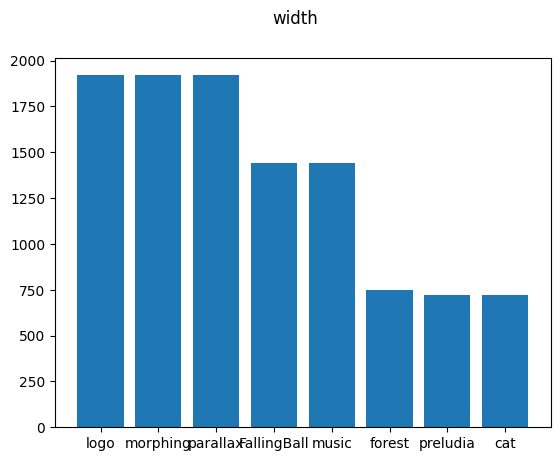

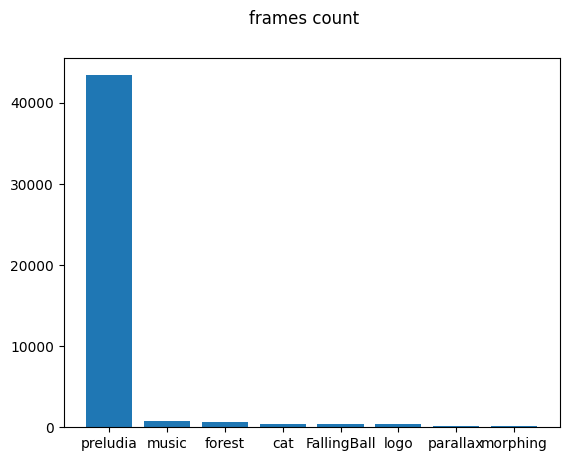

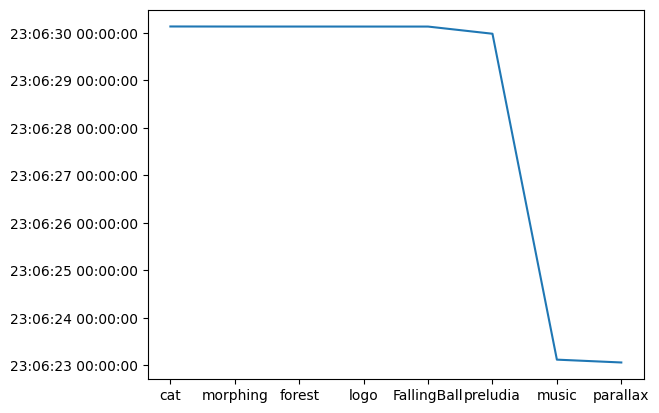

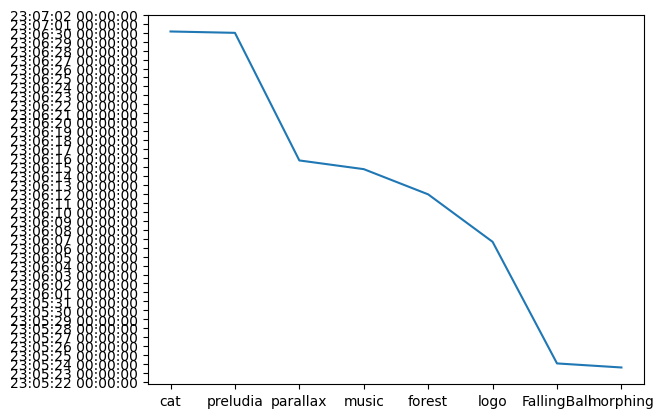

In [29]:
from db import VideoInfo
from config import DB_FILENAME
from sqlalchemy import create_engine, desc, asc
from sqlalchemy.orm import Session
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


engine = create_engine(f"sqlite:///{DB_FILENAME}", echo=False)
results = {}
with Session(engine) as session:
    results["size"] = session.query(VideoInfo.name, VideoInfo.size).order_by(desc(VideoInfo.size)).all()
    results["height"] = session.query(VideoInfo.name, VideoInfo.frameHeight).order_by(desc(VideoInfo.frameHeight)).all()
    results["width"] = session.query(VideoInfo.name, VideoInfo.frameWidth).order_by(desc(VideoInfo.frameWidth)).all()
    results["frames count"] = session.query(VideoInfo.name, VideoInfo.frames).order_by(desc(VideoInfo.frames)).all()

for plot_name, result in results.items():
    name = [row[0] for row in result]
    values = [row[1] for row in result]
    plt.bar(name, values)
    plt.suptitle(plot_name)
    plt.show()

results = {}
with Session(engine) as session:
    results["date create"] = session.query(VideoInfo.name, VideoInfo.dateCreate).order_by(desc(VideoInfo.dateCreate)).all()
    results["date change"] = session.query(VideoInfo.name, VideoInfo.dateChange).order_by(desc(VideoInfo.dateChange)).all()

for plot_name, result in results.items():
    name = [row[0] for row in result]
    values = [row[1] for row in result]
    ax = plt.subplot()
    ax.plot(name, values)
    ax.yaxis.set_major_locator(mdates.DayLocator())
    ax.yaxis.set_major_formatter(mdates.DateFormatter('%y:%m:%d %H:%M:%S'))
    plt.show()


